<a href="https://colab.research.google.com/github/velickovski/colaboratoryProjects/blob/main/CounterFitBills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

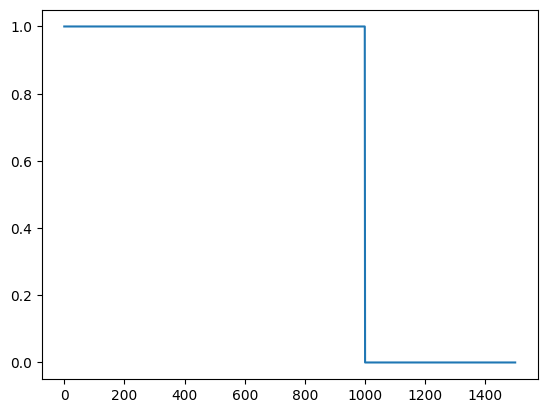

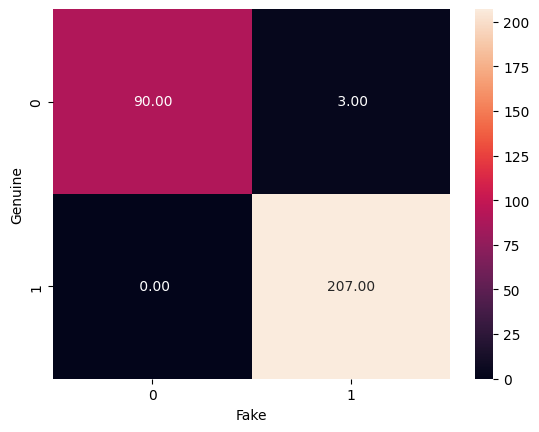

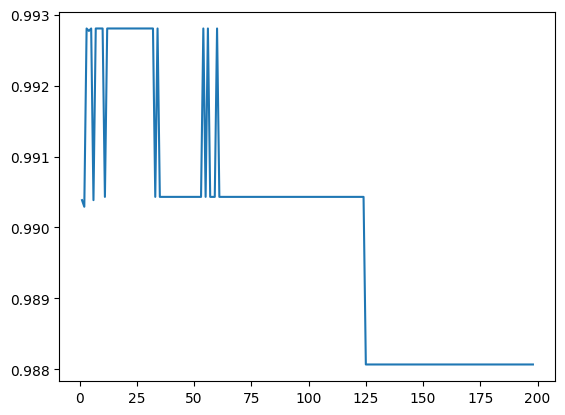

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.read_csv('/content/sample_data/fake_bills.csv', sep=';')

plt.plot(df['is_genuine'])
plt.show()
df['is_genuine'].value_counts()
label_encoder = LabelEncoder()
df['is_genuine'] = label_encoder.fit_transform(df['is_genuine'])

imputer = IterativeImputer()
df[['diagonal', 'height_left','height_right','margin_low','margin_up','length']] = imputer.fit_transform(df[['diagonal', 'height_left','height_right','margin_low','margin_up','length']])


X = df.drop(columns=['is_genuine'])
Y = df['is_genuine']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='5.2f')
plt.xlabel('Fake')
plt.ylabel('Genuine')
plt.show()
scores = []
for k in range(1, 199):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_test)
    sc = f1_score(preds, Y_test)
    scores.append(sc)

plt.plot(np.arange(1, 199), scores)
plt.show()

